In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Datasets/main_data2.csv')

In [3]:
df

,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,2BF0F5D1852,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
1,2CA3A78FEA9,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
2,2C586661A56,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
3,2C1C97E4EC4,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
4,2C463B5FB4C,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
...,...,...,...,...,...,...,...,...
446102,2CC607FAE25,106.0,1.0,Premium,Delivery from Collection Point,0.0,3.3,15.96
446103,2BE6DC4FF9D,134.0,1.0,Premium,Delivery from Collection Point,10.0,1.8,19.98
446104,2C60F8DFD12,106.0,1.0,Premium,Delivery from Collection Point,0.0,3.3,15.96
446105,2A0970C954B,231.0,1.0,Standard,Delivery from Collection Point,8.5,0.0,10.14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446107 entries, 0 to 446106
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MAGIC_KEY        446107 non-null  object 
 1   BOX_ID           446107 non-null  float64
 2   BOX_COUNT        446107 non-null  float64
 3   QUALITY          446107 non-null  object 
 4   DELIVERY_OPTION  446107 non-null  object 
 5   MILK             446107 non-null  float64
 6   MEAT             446107 non-null  float64
 7   UNIT_PRICE       446107 non-null  float64
dtypes: float64(5), object(3)
memory usage: 27.2+ MB


In [5]:
df.head()

,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,2BF0F5D1852,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
1,2CA3A78FEA9,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
2,2C586661A56,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
3,2C1C97E4EC4,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
4,2C463B5FB4C,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98


In [6]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder() #creating an instance of that encoder

In [7]:
rank = ['Standard', 'Premium'] #defining the rank or order
oe = OrdinalEncoder(categories = [rank]) #creating another instance using custom rank
df['QUALITY'] = oe.fit_transform(df[['QUALITY']]) #encoding the column

In [8]:
rank = ['Home Delivery - Digital Payment', 'Home Delivery - CoD', 'Delivery from Collection Point'] #defining the rank or order
oe = OrdinalEncoder(categories = [rank]) #creating another instance using custom rank
df['DELIVERY_OPTION'] = oe.fit_transform(df[['DELIVERY_OPTION']]) #encoding the column

In [9]:
from sklearn.preprocessing import LabelEncoder #importing the labenconder
le = LabelEncoder() #creating an instance of LabelEncoder

df['MAGIC_KEY_ENCODED'] = le.fit_transform(df['MAGIC_KEY'])
df_encoded = df.drop(columns = ['MAGIC_KEY'])

In [10]:
df_encoded.head()

,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY_ENCODED
0,162.0,1.0,1.0,2.0,10.0,2.2,23.98,180376
1,162.0,1.0,1.0,2.0,10.0,2.2,23.98,345963
2,162.0,1.0,1.0,2.0,10.0,2.2,23.98,277885
3,162.0,1.0,1.0,2.0,10.0,2.2,23.98,226255
4,162.0,1.0,1.0,2.0,10.0,2.2,23.98,265991


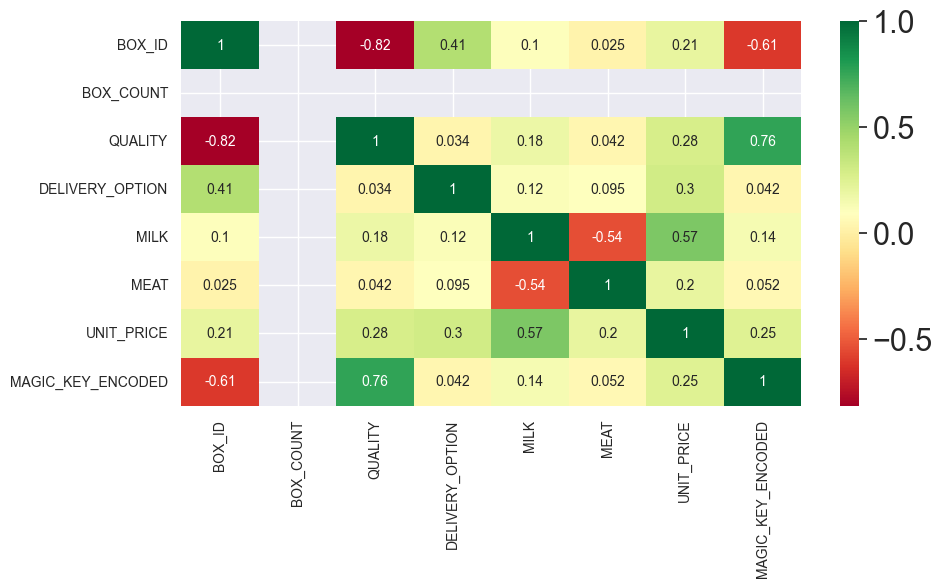

In [11]:
sns.set(font_scale = 2)
plt.subplots(figsize = (10, 5))
heat_plot = sns.heatmap(df_encoded.corr(method = 'pearson'), annot = True, cmap = 'RdYlGn', annot_kws={'size': 10})

plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

plt.show()

In [12]:
correlation = df_encoded.corr(method = 'pearson') #finding all correlation between each features
print(correlation['BOX_ID'].sort_values(ascending = False).to_string()) #printing correlation with class in descending order

BOX_ID               1.000000
DELIVERY_OPTION      0.406627
UNIT_PRICE           0.205224
MILK                 0.104540
MEAT                 0.024811
MAGIC_KEY_ENCODED   -0.606933
QUALITY             -0.816358
BOX_COUNT                 NaN


In [13]:
from sklearn.utils import shuffle #importing the suffle module
shuffled_df = shuffle(df_encoded)
shuffled_df #checking

,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY_ENCODED
108802,8.0,1.0,1.0,1.0,10.0,0.0,12.18,171040
194984,163.0,1.0,1.0,2.0,11.0,2.2,23.98,231940
305505,258.0,1.0,0.0,2.0,8.0,2.2,17.98,43967
354054,132.0,1.0,1.0,2.0,9.0,1.8,19.98,241231
100397,162.0,1.0,1.0,2.0,10.0,2.2,23.98,442201
...,...,...,...,...,...,...,...,...
28856,77.0,1.0,1.0,2.0,0.0,2.5,11.96,386285
311905,89.0,1.0,1.0,2.0,10.0,0.0,12.18,255054
163717,163.0,1.0,1.0,2.0,11.0,2.2,23.98,291508
20073,162.0,1.0,1.0,2.0,10.0,2.2,23.98,177820


In [14]:
#rearranging the index value
rearranged_df = shuffled_df.reset_index(drop = True)
rearranged_df

,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY_ENCODED
0,8.0,1.0,1.0,1.0,10.0,0.0,12.18,171040
1,163.0,1.0,1.0,2.0,11.0,2.2,23.98,231940
2,258.0,1.0,0.0,2.0,8.0,2.2,17.98,43967
3,132.0,1.0,1.0,2.0,9.0,1.8,19.98,241231
4,162.0,1.0,1.0,2.0,10.0,2.2,23.98,442201
...,...,...,...,...,...,...,...,...
446102,77.0,1.0,1.0,2.0,0.0,2.5,11.96,386285
446103,89.0,1.0,1.0,2.0,10.0,0.0,12.18,255054
446104,163.0,1.0,1.0,2.0,11.0,2.2,23.98,291508
446105,162.0,1.0,1.0,2.0,10.0,2.2,23.98,177820


In [15]:
X = rearranged_df.drop(columns = ['BOX_ID']) #dropping the class collumn to separate the feature
X

,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY_ENCODED
0,1.0,1.0,1.0,10.0,0.0,12.18,171040
1,1.0,1.0,2.0,11.0,2.2,23.98,231940
2,1.0,0.0,2.0,8.0,2.2,17.98,43967
3,1.0,1.0,2.0,9.0,1.8,19.98,241231
4,1.0,1.0,2.0,10.0,2.2,23.98,442201
...,...,...,...,...,...,...,...
446102,1.0,1.0,2.0,0.0,2.5,11.96,386285
446103,1.0,1.0,2.0,10.0,0.0,12.18,255054
446104,1.0,1.0,2.0,11.0,2.2,23.98,291508
446105,1.0,1.0,2.0,10.0,2.2,23.98,177820


In [16]:
y =  rearranged_df['BOX_ID'] #separating target to y
y

0           8.0
1         163.0
2         258.0
3         132.0
4         162.0
          ...  
446102     77.0
446103     89.0
446104    163.0
446105    162.0
446106    258.0
Name: BOX_ID, Length: 446107, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split #importing module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) #80-20% split

In [18]:
print(len(X_train)) #checking
print(len(X_test))

356885
89222


In [19]:
print(len(y_train)) #checking
print(len(y_test))

356885
89222


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)
tree_clf.fit(X, y)
tree_clf.feature_importances_

array([0.        , 0.10156039, 0.0890412 , 0.25864151, 0.19689337,
       0.35386353, 0.        ])

In [22]:
#creating instance of decision tree, depth 2
tree_clf = DecisionTreeClassifier(max_depth = 20, random_state = 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [23]:
y_pred = tree_clf.predict(X_test)

In [24]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9999775840039452

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state = 42)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

In [ ]:
df_problem = pd.read_csv('Datasets/problem 2.csv')

In [ ]:
df_problem

In [ ]:
df = df.drop(columns = ['BOX_ID'])
df

In [ ]:
df_test = pd.merge(df_problem, df, on = 'MAGIC_KEY')
df_test

In [ ]:
df_test_X = df_test.drop(columns = ['MAGIC_KEY'])
df_test_X

In [ ]:
y_pred = tree_clf.predict(df_test_X)
y_pred

In [ ]:
# Add the predicted values as a new column to X_test
df_test['BOX_ID'] = y_pred

# Now X_test contains the predicted values in the 'y_pred' column
df_test

In [ ]:
solutions = df_test[['MAGIC_KEY', 'BOX_ID']].copy()
solutions

In [ ]:
solutions.to_csv("Submission.csv", index=False)  # Save test data